In [1]:
!pip install langchain langgraph cassio

In [2]:
!pip install langchain_community

In [3]:
!pip install -U langchain_community tiktoken langchain-groq langchainhub chromadb langchain langgraph langchain_huggingface

In [4]:
import cassio
ASTRA_DB_APPLICATION_TOKEN = "AstraCS:DHXHpyDSDzDEJgnCEmpMvMhU:bcabbd14b419dce9d8617a4408d370ac37be10d33c26720664744cc7956012a0"
ASTRA_DB_ID = "4d0ac63c-db4d-4461-a30b-5654bec200c2"
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN, database_id=ASTRA_DB_ID)

In [17]:
# Import necessary libraries
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

# Step 1: Load and split documents
urls = [
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
]
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]
# print(docs_list)
# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=2000, chunk_overlap=500)
doc_splits = text_splitter.split_documents(docs_list)


In [72]:

import os
from getpass import getpass
import nest_asyncio
nest_asyncio.apply()
# You can set the API key like this:
os.environ["LLAMA_CLOUD_API_KEY"] = "llx-b5toQL69c8MZWasKLSTipIp6Rzrwf9rpYntsCKn5fnWZEg7X"  # Your actual API key
from llama_parse import LlamaParse
pdf_path = r"C:\Users\pavan\Downloads\GenAi.pdf"
documents = LlamaParse(result_type="text", verbose=True).load_data(pdf_path)

Started parsing the file under job_id 3a85458f-9cdb-41f0-8a8c-3a472d3e5814


In [33]:
print(documents)

[Document(id_='46ff5e7c-53e5-4009-9f8a-4316b9c934c0', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='                           World Health\n                           Organization\n                                                                  FACT SHEET 1\n\n                                  What is Air Pollution?\nWhat is air pollution?\n\n•    Air pollution is the contamination of the\n     indoor or outdoor air by a range of\n     gasses and solids that modify its\n     natural characteristics. Key health-\n     harmful pollutants include particulate\n     matter (PM2.5 and PM10) 1 , carbon\n     monoxide (CO), ozone (O3), black\n     carbon      (BC),     sulfur     dioxide     and\n     nitrogen oxides (NOx).\n•    Air pollution is often not visible to the\n     naked eye as the size of the pollutants\n     are smaller than the human eye can\n     detect.     They can become visible in\n     some situation

In [73]:
# Import necessary libraries
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document  # Use this to create Document objects

# First, extract text from the documents parsed by LlamaParse
# Assuming documents is a list of text content, convert each entry to a Document

document_objects = [Document(page_content=doc.get_content()) for doc in documents]

# Now, use RecursiveCharacterTextSplitter to split documents into chunks
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000, chunk_overlap=0)
doc_splits = text_splitter.split_documents(document_objects)

# Now you have the PDF content split into chunks
# You can print or process it further
for split in doc_splits:
    print(split)


page_content='iJRASET
                            International Journal For Research in
                            Applied Science and Engineering Technology
           CH; 0
                                              -100
                                             50
 45
INTERNATIONAL JOURNAL
             FOR RESEARCH
     IN APPLIED SCIENCE & ENGINEERING TECHNOLOGY
 Volume:        Issue:       Month of publication:
 DOI:
                    wwW.ijraset.com
Call:    08813907089           E-mail ID: ijraset@gmail.com
               12              V                                   May 2024

           https://doi.org/10.22214/ijraset.2024.62488'
page_content='({Research I /Applied} Scicnce / 0 International Journal for Research in Applied Science & Engineering Technology (IJRAISSN: 2321-9653; IC Value: 45.98; SJ Impact Factor: 7.538)
                                                                                                                  Volume 12 Issue V May 2024- Avai

In [74]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

# Step 3: Store embeddings in AstraDB
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings, table_name="demo6")
astra_vector_store.add_documents(doc_splits)

c:\Users\pavan\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


c:\Users\pavan\anaconda3\Lib\re\__init__.py:361: RuntimeWarning: coroutine 'LlamaParse.aload_data' was never awaited
  m = match()


['76a34e78bfb348f38c505348a6b7af99',
 'a91f8351735e4316a177ae8713772f20',
 '56024dec893943fdbf0ab4834ce301a0',
 'b86d85e50fa946399d7f14a41d378ef4',
 'e526ad80b1364824b917054698b0313d',
 '2de7e48b107c431dbcc9dbc187412388',
 'b8ccbe7da099417ab78d7244f7b32ba8',
 '73554bda76ca4a339e6991e594a856ea',
 '702f9c25cab24dfd87544ad8a0931de9',
 'fe6695e98162428ab4410d49759153f0',
 'd571b3281a4e4c1dbacfe9cfffc8b8f9',
 'b3e0c03e05d4490499b95eb8b3a17372',
 'd1fe91cbaca34f3faea2866eec0de5c8',
 'ab284f97eb2544bb859ed6d3209243ea',
 'b2fcdc4ab7b041c6bdec8d93c0b40c57',
 '9fffee54c8a842a998d6b80bf2c5c610',
 'a03a1095b39249e785dddc125f2b4da4',
 'f48064bc4f51447ebda4eb45d77b0369',
 '077a2c03b95f486a9aafc8b4019d98bf',
 'b779e969aa9e407fa87517c405eb776e']

In [67]:
# Assuming you want to retrieve the top N results
 # Set this to the number of top results you want

retriever = astra_vector_store.as_retriever()

# Modify the invoke method to include a parameter for the number of top results
results = retriever.invoke("ABSTRACT", ConsistencyLevel="LOCAL_ONE")

retrieved_content = "\n\n".join([doc.page_content for doc in results])
# print(retrieved_content)

from collections import OrderedDict 

def remove_duplicates(text):
    # Split the text into lines and remove duplicate lines
    lines = text.split('\n')
    unique_lines = list(OrderedDict.fromkeys(lines))  # Preserve the order and remove duplicates
    return '\n'.join(unique_lines)

cleaned_text = remove_duplicates(retrieved_content)
print(cleaned_text)

P. Babakhani et al.: Opinerium: Subjective Question Generation Using Large Language Models
                                                                   flan-TS-small                                                     flan-TS-base                                                                 flan-T5-large
                              Human          1.00              0 04     0.03      0.15              0.04          1.00           0.04     oloo                        001       0.18                 0.01     0.01     20 03                 loq
                                BLEU        0.06      1.00     0.83     0.87                              0 10                   0,83     0.88               0.12               0.20                 1.00     0.84     0.88      0.33  0.05  U,UU      0.10             0.75
                             ROUCE           0.04     0,83     1,00     0,86      0,12              0,07  010     0,04  0 83              0,87      0,32     0,10              

In [78]:
from langchain_groq import ChatGroq
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)
groq_api_key = "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"
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-70b-versatile")
answer = astra_vector_index.query("What is the Conclustion ?", llm=llm).strip()
print("ANSWER: \"%s\"\n" % answer)


ANSWER: "The provided context does not explicitly state a conclusion. However, it appears to be a description of a system for checking the similarity between a model answer and a student's answer, using various mathematical models and algorithms. The text explains the different components of the system, including keyword matching, sentence matching, and meaningful sentence matching, as well as the calculation of a total similarity score. It also describes the code structure and functionality, including the use of an external library called "Mammoth" for text extraction."



In [39]:
# !pip install pypdf

# Import necessary libraries
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFLoader

# Step 1: Load and split PDF documents
pdf_path = r"C:\Users\pavan\Downloads\what-is-air-pollution-2019.pdf"  # Replace with the path to your PDF

# Load the PDF
loader = PyPDFLoader(pdf_path)
docs = loader.load()

# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=0)
doc_splits = text_splitter.split_documents(docs)

# Now you have the PDF content split into chunks
# You can print or process it further
print(doc_splits)


[Document(metadata={'source': 'C:\\Users\\pavan\\Downloads\\what-is-air-pollution-2019.pdf', 'page': 0}, page_content='FACT SHEET 1  \nWhat is Air Pollution? \nWhat is air pollution? \n\uf0b7Air pollution is the contamination of the\nindoor or outdoor air by a range of\ngasses and solids that modify its\nnatural characteristics. Key health-\nharmful pollutants include particulate\nmatter (PM2.5 and PM10) 1, carbon\nmonoxide (CO), ozone (O3), black\ncarbon (BC), sulfur dioxide and\nnitrogen oxides (NOx).\n\uf0b7Air pollution is often not visible to the\nnaked eye as the size of the pollutants\nare smaller than the human eye can\ndetect.  T hey can become visible in\nsome situations for example in the form\nof sooty smoke  from the open burning\nof crop residues or other waste, as well\nas from burning wood, coal, petrol and\ndiesel fuels for cooking and heating,\ntransport or power production.   The fact\nthat you cannot see the air pollution\ndoes not mean that it does not exist.\nWhat

In [40]:
# Step 2: Generate embeddings using HuggingFace model
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\pavan\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [41]:
# Step 3: Store embeddings in AstraDB
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings, table_name="demo2")
astra_vector_store.add_documents(doc_splits)

['a3a37e72511a4bcd918a5e12cbaa6524',
 '1ecd7852d75741c8b2981e597be2757b',
 'f54cb88b97a548588eaf846a24b9fae7',
 '9abe1896566f4b99a8ab2a20f3b3eedb']

In [43]:
# Assuming you want to retrieve the top N results
 # Set this to the number of top results you want

retriever = astra_vector_store.as_retriever()

# Modify the invoke method to include a parameter for the number of top results
results = retriever.invoke("What is Air Pollution", ConsistencyLevel="LOCAL_ONE")

retrieved_content = "\n\n".join([doc.page_content for doc in results])
# print(retrieved_content)

from collections import OrderedDict

def remove_duplicates(text):
    # Split the text into lines and remove duplicate lines
    lines = text.split('\n')
    unique_lines = list(OrderedDict.fromkeys(lines))  # Preserve the order and remove duplicates
    return '\n'.join(unique_lines)

cleaned_text = remove_duplicates(retrieved_content)
cleaned_text

'FACT SHEET 1  \nWhat is Air Pollution? \nWhat is air pollution? \n\uf0b7Air pollution is the contamination of the\nindoor or outdoor air by a range of\ngasses and solids that modify its\nnatural characteristics. Key health-\nharmful pollutants include particulate\nmatter (PM2.5 and PM10) 1, carbon\nmonoxide (CO), ozone (O3), black\ncarbon (BC), sulfur dioxide and\nnitrogen oxides (NOx).\n\uf0b7Air pollution is often not visible to the\nnaked eye as the size of the pollutants\nare smaller than the human eye can\ndetect.  T hey can become visible in\nsome situations for example in the form\nof sooty smoke  from the open burning\nof crop residues or other waste, as well\nas from burning wood, coal, petrol and\ndiesel fuels for cooking and heating,\ntransport or power production.   The fact\nthat you cannot see the air pollution\ndoes not mean that it does not exist.\nWhat are the most health \nharmful air pollutants? \n\uf0b7WHO has air quality guidelines for air\npollutants which are re

In [44]:
from langchain_groq import ChatGroq
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)
groq_api_key = "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"
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-70b-versatile")
answer = astra_vector_index.query("What is Air Pollution", llm=llm).strip()
print("ANSWER: \"%s\"\n" % answer)


ANSWER: "According to the provided fact sheet, air pollution is the contamination of the indoor or outdoor air by a range of gases and solids that modify its natural characteristics. Key health-harmful pollutants include particulate matter (PM2.5 and PM10), carbon monoxide (CO), ozone (O3), black carbon (BC), sulfur dioxide, and nitrogen oxides (NOx)."



In [11]:
# Step 4: Set up ChatGroq for routing logic
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel
from typing import Literal
from langchain_core.pydantic_v1 import BaseModel, Field
# Data model
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""

    datasource: Literal["vectorstore", "pretrained_model"] = Field(
        ...,
        description="Given a user question choose to route it to vectorstore or pretrained model.",
    )
groq_api_key = "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"
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-70b-versatile")
structured_llm_router = llm.with_structured_output(schema=RouteQuery)
# Define a schema for routing
class RouteQuery(BaseModel):
    """Schema to determine whether to route to vectorstore or pretrained model."""
    datasource: Literal["vectorstore", "pretrained_model"]

# Define a system prompt for routing
system = """You are an expert at routing a user question. 
Use the vectorstore for questions related to Prompt Engineering. 
else use pretrained model"""

route_prompt = ChatPromptTemplate.from_messages([
    ("system", system),
    ("human", "{question}")
])

# Specify the schema in with_structured_output

question_router = route_prompt | structured_llm_router
print(
    question_router.invoke(
        {"question": "who is Sharukh Khan?"}
    )
)
print(question_router.invoke({"question": "What is ML?"}))

datasource='pretrained_model'
datasource='pretrained_model'


In [12]:
# Step 5: Define the LangGraph workflow
from typing import List
from typing_extensions import TypedDict

# Define GraphState
class GraphState(TypedDict):
    question: str
    documents: List[str]
    generation: str

# Define the retrieve node (vectorstore querying)
def retrieve(state):
    print("---RETRIEVE FROM VECTORSTORE---")
    question = state["question"]
    documents = retriever.invoke(question)

    # Join document content into a single string to pass it to the LLM for question generation
    retrieved_content = "\n\n".join([doc.page_content for doc in documents])
    # Pass the retrieved content to ChatGroq for question generation
    llm_prompt = f"Based on the following document content, generate three questions:\n{retrieved_content}"
    questions = llm.invoke(llm_prompt)
    return {"generation": questions, "question": question}

# Define the LLM query node (direct pretrained model query)
def llm_query(state):
    print("---PRETRAINED MODEL QUERY---")
    question = state["question"]
    llm_prompt = f"Generate three questions about the topic: {question}"
    questions = llm.invoke(llm_prompt)
    return {"generation": questions, "question": question}


In [13]:
# Define the routing node
def route_question(state):
    
    print("---ROUTING QUESTION---")
    question = state["question"]

    source = question_router.invoke({"question": question})
    # Routing based on topic
    if source.datasource == "vectorstore":
        print("---ROUTE TO VECTOR STORE----")
        return "retrieve"
    else:
        print("---ROUTE TO PRETRAINED MODEL----")
        return "llm_query"


In [14]:
# !pip install --upgrade pydantic
from langgraph.graph import END, START, StateGraph

# Step 6: Build LangGraph workflow
workflow = StateGraph(GraphState)
workflow.add_node("retrieve", retrieve)  # Retrieve from vectorstore and pass to LLM
workflow.add_node("llm_query", llm_query)  # Query the LLM directly

# Define conditional edges for routing
workflow.add_conditional_edges(
    START, route_question, {
        "retrieve": "retrieve",
        "llm_query": "llm_query",
    }
)

# End nodes after retrieval or LLM query
workflow.add_edge("retrieve", END)
workflow.add_edge("llm_query", END)

# Compile the workflow
app = workflow.compile()


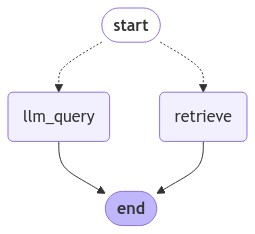

In [15]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [16]:
# # Step 7: Execute the workflow
# inputs = {
#     "question": "Java"
# }
# for output in app.stream(inputs):
#     for key, value in output.items():
#         print(f"Node '{key}':")
#         print(value)

# Example for querying ML topic
inputs_ml = {
    "question": "Prompt Engineering"
}
for output in app.stream(inputs_ml):
    for key, value in output.items():
        print(f"Node '{key}':")
        print(value)


---ROUTING QUESTION---
---ROUTE TO VECTOR STORE----
---RETRIEVE FROM VECTORSTORE---
Node 'retrieve':
{'question': 'Prompt Engineering', 'generation': AIMessage(content="Here are three questions based on the document content:\n\n1. What are some examples of occupational exposures that can increase a person's vulnerability to air pollution?\n\n2. How does low socioeconomic status affect a person's vulnerability to air pollution, and who is particularly vulnerable in this context?\n\n3. What are some specific weather patterns and seasonal factors that can contribute to high concentrations of particulate matter in the air, making people more vulnerable to air pollution?", response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1143, 'total_tokens': 1232, 'completion_time': 0.356, 'prompt_time': 0.285637751, 'queue_time': 0.005320676999999996, 'total_time': 0.641637751}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b6828be2c9', 'finish_reason': 'st